## Import Model

In [200]:
import pandas as pd
import numpy as np
from datetime import datetime
import calendar
from datetime import timedelta
import copy
import csv
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import matplotlib

In [62]:
# To make better plot later
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300

In [2]:
data_raw = pd.read_csv("/Users/lengjincheng/Desktop/多大/大三study/Datafest 2020.6/Data-Fest-Covid19/merged_rest_info_new (4).csv",encoding = "ISO-8859-1")

/Users/lengjincheng/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#get binary, 
def label_bi(x):
    if x == "CLOSED_PERMANENTLY" or x == 'CLOSED_TEMPORARILY' :
        return [0,1]
    if x== 'OPERATIONAL':
        return [1,0]

In [4]:
#正常clasify的，都算成close
data_bi_1 = data_raw[data_raw.Found_by_g == True]
data_bi_2 = data_bi_1.drop(19558,axis = 0)
data_bi_3 = data_bi_2.drop(["Found_by_g","name_g","place_id_g","lat_g","lng_g","is_open"],axis = 1) #删除一些不需要的
data_bi_3["label"] = data_bi_3.status_g.apply(lambda x: label_bi(x))
data_bi_final = data_bi_3.drop(["address","name","formatted_address_g","status_g","More","Unnamed: 0"],axis = 1)

In [5]:
#label
def label_status(x):
    if x == "CLOSED_PERMANENTLY":
        return [0,0,1]
    if x== 'OPERATIONAL':
        return [1,0,0]
    if x == 'CLOSED_TEMPORARILY':
        return [0,1,0]

In [6]:
# 改找不到的status
def change_status(x):
    if x.Found_by_g == "False":
        return "CLOSED_PERMANENTLY"

In [7]:
# 把找不到的算成permant close
data_tri_1 = copy.deepcopy(data_raw)
data_tri_1.loc[data_tri_1["Found_by_g"] == False,"status_g"] = "CLOSED_PERMANENTLY"
data_tri_2 = data_tri_1.drop([19558,42001],axis = 0)
data_tri_3 = data_tri_2.drop(["Found_by_g","name_g","place_id_g","lat_g","lng_g","is_open"],axis = 1) #删除一些不需要的
data_tri_3["label"] = data_tri_3.status_g.apply(lambda x: label_status(x))
data_tri_final = data_tri_3.drop(["address","name","formatted_address_g","status_g","More","Unnamed: 0"],axis = 1)

In [8]:
data_bi_final.to_csv("两种，找不到扔掉.csv",index = None)
data_tri_final.to_csv("三种.csv",index = None)

### one hot

In [8]:
#用get dummies弄
data_tri_oh = data_tri_3.drop(["address","name","formatted_address_g","label","More","Unnamed: 0"],axis = 1) #没弄三个的
encoded = pd.get_dummies(data_tri_oh["status_g"])
data_tri_ohfinal = data_tri_oh.join(encoded).drop("status_g",axis = 1)

In [9]:
data_status = data_tri_oh[["business_id","status_g"]]

In [67]:
data_tri_ohfinal.to_csv("两种，找不到扔掉.csv",index = None)

# ready to join

In [201]:
data_no_status = pd.read_csv("/Users/lengjincheng/Desktop/多大/大三study/Datafest 2020.6/Data-Fest-Covid19/最终feature/no_status, ready to join.csv")

/Users/lengjincheng/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,11,89,92,96) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [202]:
data_no_status.head()

,business_id,Cases,Deaths,name,address,city,state,postal_code,latitude,longitude,...,categories_Sports Bars,categories_Asian Fusion,categories_Mediterranean,total_checkIn,checkIn_2019,chain,covid_cumul_case_state,covid_cumul_death_state,dayOfStart,land_price
0,eBEfgOPG7pvFhb2wcG9I7w,2650.0,222.0,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,...,False,False,False,1.0,1,True,32033.0,2484.0,522,11225
1,lu7vtrp_bE9PnxWfA8g4Pg,2650.0,222.0,Banzai Sushi,300 John Street,Thornhill,ON,L3T 5W4,43.820492,-79.398466,...,False,False,False,8.0,0,False,32033.0,2484.0,2020,11225
2,9sRGfSVEfLhN_km60YruTA,2650.0,222.0,Apadana Restaurant,13071 Yonge Street,Richmond Hill,ON,L4E 1A5,43.947011,-79.454862,...,False,False,False,2.0,2,False,32033.0,2484.0,443,11225
3,pcaQDBM6r0PWTXfYZK6RdA,26288.0,3068.0,IGA Extra,8130 Boulevard Champlain,Lasalle,QC,H8P 1B4,45.425645,-73.611934,...,False,False,False,181.0,13,False,52849.0,4978.0,3266,6606
4,LoRef3ChgZKbxUio-sHgQg,26288.0,3068.0,Amir,5252 Rue Jean Talon O,MontrÂ©al,QC,H4P 2A7,45.494870,-73.651904,...,False,False,False,10.0,0,True,52849.0,4978.0,2575,6606


In [13]:
df_final = pd.merge(left=data_no_status, right=data_status , left_on='business_id', right_on='business_id')

In [20]:
df_final.to_csv("没有sample的最终.csv")

In [14]:
df_final

,business_id,Cases,Deaths,name,address,city,state,postal_code,latitude,longitude,...,categories_Asian Fusion,categories_Mediterranean,total_checkIn,checkIn_2019,chain,covid_cumul_case_state,covid_cumul_death_state,dayOfStart,land_price,status_g
0,eBEfgOPG7pvFhb2wcG9I7w,2650.0,222.0,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,...,False,False,1.0,1,True,32033.0,2484.0,522,11225,OPERATIONAL
1,lu7vtrp_bE9PnxWfA8g4Pg,2650.0,222.0,Banzai Sushi,300 John Street,Thornhill,ON,L3T 5W4,43.820492,-79.398466,...,False,False,8.0,0,False,32033.0,2484.0,2020,11225,OPERATIONAL
2,9sRGfSVEfLhN_km60YruTA,2650.0,222.0,Apadana Restaurant,13071 Yonge Street,Richmond Hill,ON,L4E 1A5,43.947011,-79.454862,...,False,False,2.0,2,False,32033.0,2484.0,443,11225,CLOSED_TEMPORARILY
3,pcaQDBM6r0PWTXfYZK6RdA,26288.0,3068.0,IGA Extra,8130 Boulevard Champlain,Lasalle,QC,H8P 1B4,45.425645,-73.611934,...,False,False,181.0,13,False,52849.0,4978.0,3266,6606,OPERATIONAL
4,LoRef3ChgZKbxUio-sHgQg,26288.0,3068.0,Amir,5252 Rue Jean Talon O,MontrÂ©al,QC,H4P 2A7,45.494870,-73.651904,...,False,False,10.0,0,True,52849.0,4978.0,2575,6606,OPERATIONAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56169,AlwKuzyrrxlZ04ktebwmcA,824.0,29.0,Pizza Pit,13 Atlas Ct,Madison,WI,53714,43.086793,-89.306868,...,False,False,7.0,0,True,20701.0,646.0,3542,70070,OPERATIONAL
56170,cmsAFAymfVoBitSF8R6GKw,12761.0,489.0,Yao Fine Chinese Cuisine,"2487 S Gilbert Rd, Ste 102",Gilbert,AZ,85295,33.304935,-111.788861,...,False,False,419.0,23,False,25517.0,1047.0,3766,26493,OPERATIONAL
56171,YZeUH6zYS0dq5QHLYZhUnQ,12761.0,489.0,Hooters,2820 N 75th Ave,Phoenix,AZ,85035,33.479139,-112.221142,...,False,False,253.0,9,True,25517.0,1047.0,3076,26493,OPERATIONAL
56172,hskVqZCPqy-omm9CHi44xQ,5358.0,106.0,Domino's,"6420 Rea Rd, Suite B1",Charlotte,NC,28226,35.078538,-80.818358,...,False,False,6.0,0,True,34809.0,1020.0,3396,38976,OPERATIONAL


## Deal with inbalance dataset

In [19]:
data_closed_tri_s =  df_final.loc[df_final.status_g != "OPERATIONAL"]
data_op_tri_sampled_s =  df_final.loc[df_final.status_g == "OPERATIONAL"].sample(n=7000,random_state=42)
data_sample_comb_s = pd.concat([data_closed_tri_s, data_op_tri_sampled_s])

In [21]:
data_sample_comb_s.to_csv("sample以后的最终.csv",index = None)

In [20]:
data_sample_comb_s 

,business_id,Cases,Deaths,name,address,city,state,postal_code,latitude,longitude,...,categories_Asian Fusion,categories_Mediterranean,total_checkIn,checkIn_2019,chain,covid_cumul_case_state,covid_cumul_death_state,dayOfStart,land_price,status_g
2,9sRGfSVEfLhN_km60YruTA,2650.0,222.0,Apadana Restaurant,13071 Yonge Street,Richmond Hill,ON,L4E 1A5,43.947011,-79.454862,...,False,False,2.0,2,False,32033.0,2484.0,443,11225,CLOSED_TEMPORARILY
7,RrapAhd8ZxCj-iue7fu9FA,4955.0,110.0,Ganga Restaurant,515 4th Avenue SW,Calgary,AB,T2P 0J8,51.049407,-114.072656,...,False,False,NaN,None,False,7138.0,146.0,None,2941,CLOSED_PERMANENTLY
9,0Y5Kzo8PWHTjk0tlfAKcDQ,26288.0,3068.0,Caballero,804www.caballerolounge.com Rue Roy E,MontrÂ©al,QC,H2L 1E3,45.520699,-73.572642,...,False,False,8.0,0,False,52849.0,4978.0,1762,6606,CLOSED_PERMANENTLY
16,cicPsia8Wj-DNRkmLbD_xg,12707.0,944.0,The Keg Steakhouse + Bar,2201 Yonge Street,Toronto,ON,M4S 2B2,43.705843,-79.397841,...,False,False,238.0,13,True,32033.0,2484.0,3730,11225,CLOSED_TEMPORARILY
17,2aWV8Rx4TwtB0x2pfIPNxA,26288.0,3068.0,Restaurant Houston Steaks et Cotes Levees,"Aeroport Trudeau Montreal, US Departures Side",Dorval,QC,NaN,45.456099,-73.753125,...,False,False,265.0,30,False,52849.0,4978.0,2746,6606,CLOSED_PERMANENTLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5008,lUIKCofKNVMluW0LAw1eEQ,12707.0,944.0,Happy Tummy Filipino Cuisine,2950 Birchmount Road,Toronto,ON,M1W 3G5,43.799340,-79.306635,...,False,False,35.0,4,False,32033.0,2484.0,1631,11225,OPERATIONAL
37096,zXjA4Jms2jCAP09EO7Ghfg,12761.0,489.0,Wok Fire,"8940 W Bell Rd, Ste B103",Peoria,AZ,85382,33.639642,-112.251116,...,False,FALSE,92.0,8,FALSE,25517.0,1047.0,1706,26493,OPERATIONAL
45833,gHVg2CnW8Bw41sKiKi3t3Q,824.0,29.0,Metro Market,6010 Cottage Grove Rd,Madison,WI,53718,43.084740,-89.275696,...,False,False,365.0,36,False,20701.0,646.0,2191,70070,OPERATIONAL
46233,1zKjojtmAHuVOHhtGVxC2Q,4827.0,265.0,Jukebox,1404 W 29th St,Cleveland,OH,44113,41.489558,-81.710894,...,False,False,315.0,29,True,38112.0,2370.0,2123,86180,OPERATIONAL


## Proportion of deaths/ Cases in each region

In [87]:
df_noplace = pd.read_csv("/Users/lengjincheng/Desktop/多大/大三study/Datafest 2020.6/Data-Fest-Covid19/最终feature/没有sample的最终.csv")
df_ca = pd.read_csv("/Users/lengjincheng/Desktop/多大/大三study/Datafest 2020.6/Data-Fest-Covid19/postal code/Canada Cases and Deaths Info.csv")
df_us = pd.read_csv("/Users/lengjincheng/Desktop/多大/大三study/Datafest 2020.6/Data-Fest-Covid19/postal code/tl_2017_us_county/US cases and death.csv")

/Users/lengjincheng/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8,12,90,93,97) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [97]:
df_region = pd.concat([df_ca,df_us])[["business_id","health_region_id","health_region_name"]]

In [98]:
df_region

,business_id,health_region_id,health_region_name
0,eBEfgOPG7pvFhb2wcG9I7w,3570,York Regional Health Unit
1,lu7vtrp_bE9PnxWfA8g4Pg,3570,York Regional Health Unit
2,9sRGfSVEfLhN_km60YruTA,3570,York Regional Health Unit
3,pcaQDBM6r0PWTXfYZK6RdA,2406,RÃ©gion de MontrÃ©al
4,LoRef3ChgZKbxUio-sHgQg,2406,RÃ©gion de MontrÃ©al
...,...,...,...
34201,AlwKuzyrrxlZ04ktebwmcA,55025,Dane
34202,cmsAFAymfVoBitSF8R6GKw,4013,Maricopa
34203,YZeUH6zYS0dq5QHLYZhUnQ,4013,Maricopa
34204,hskVqZCPqy-omm9CHi44xQ,37119,Mecklenburg


In [99]:
df_reg_final  = pd.merge(left=df_noplace, right=df_region , left_on='business_id', right_on='business_id')

In [184]:
df_reg_final  

,Unnamed: 0,business_id,Cases,Deaths,name,address,city,state,postal_code,latitude,...,total_checkIn,checkIn_2019,chain,covid_cumul_case_state,covid_cumul_death_state,dayOfStart,land_price,status_g,health_region_id,health_region_name
0,0,eBEfgOPG7pvFhb2wcG9I7w,2650.0,222.0,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,...,1.0,1,True,32033.0,2484.0,522,11225,OPERATIONAL,3570,York Regional Health Unit
1,1,lu7vtrp_bE9PnxWfA8g4Pg,2650.0,222.0,Banzai Sushi,300 John Street,Thornhill,ON,L3T 5W4,43.820492,...,8.0,0,False,32033.0,2484.0,2020,11225,OPERATIONAL,3570,York Regional Health Unit
2,2,9sRGfSVEfLhN_km60YruTA,2650.0,222.0,Apadana Restaurant,13071 Yonge Street,Richmond Hill,ON,L4E 1A5,43.947011,...,2.0,2,False,32033.0,2484.0,443,11225,CLOSED_TEMPORARILY,3570,York Regional Health Unit
3,3,pcaQDBM6r0PWTXfYZK6RdA,26288.0,3068.0,IGA Extra,8130 Boulevard Champlain,Lasalle,QC,H8P 1B4,45.425645,...,181.0,13,False,52849.0,4978.0,3266,6606,OPERATIONAL,2406,RÃ©gion de MontrÃ©al
4,4,LoRef3ChgZKbxUio-sHgQg,26288.0,3068.0,Amir,5252 Rue Jean Talon O,MontrÂ©al,QC,H4P 2A7,45.494870,...,10.0,0,True,52849.0,4978.0,2575,6606,OPERATIONAL,2406,RÃ©gion de MontrÃ©al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56169,56169,AlwKuzyrrxlZ04ktebwmcA,824.0,29.0,Pizza Pit,13 Atlas Ct,Madison,WI,53714,43.086793,...,7.0,0,True,20701.0,646.0,3542,70070,OPERATIONAL,55025,Dane
56170,56170,cmsAFAymfVoBitSF8R6GKw,12761.0,489.0,Yao Fine Chinese Cuisine,"2487 S Gilbert Rd, Ste 102",Gilbert,AZ,85295,33.304935,...,419.0,23,False,25517.0,1047.0,3766,26493,OPERATIONAL,4013,Maricopa
56171,56171,YZeUH6zYS0dq5QHLYZhUnQ,12761.0,489.0,Hooters,2820 N 75th Ave,Phoenix,AZ,85035,33.479139,...,253.0,9,True,25517.0,1047.0,3076,26493,OPERATIONAL,4013,Maricopa
56172,56172,hskVqZCPqy-omm9CHi44xQ,5358.0,106.0,Domino's,"6420 Rea Rd, Suite B1",Charlotte,NC,28226,35.078538,...,6.0,0,True,34809.0,1020.0,3396,38976,OPERATIONAL,37119,Mecklenburg


In [105]:
df_reg_part = df_reg_final[["business_id","status_g","health_region_id","health_region_name"]]

In [107]:
df_part_op =  df_reg_part[df_reg_part["status_g"] == "OPERATIONAL"]
df_part_temp = df_reg_part[df_reg_part["status_g"] == "CLOSED_TEMPORARILY"]
df_part_per = df_reg_part[df_reg_part["status_g"] == "CLOSED_PERMANENTLY"]

In [118]:
df_reg_info = pd.DataFrame(df_reg_part.groupby(["health_region_name","status_g"]).size())

In [120]:
df_reg_info

0
health_region_name        status_g                
Allegheny                 CLOSED_PERMANENTLY   174
                          CLOSED_TEMPORARILY   222
                          OPERATIONAL         3161
Arapahoe                  OPERATIONAL            1
Beaver                    CLOSED_PERMANENTLY     1
...                                            ...
York                      CLOSED_TEMPORARILY     4
                          OPERATIONAL          309
York Regional Health Unit CLOSED_PERMANENTLY   143
                          CLOSED_TEMPORARILY    98
                          OPERATIONAL         2287

[124 rows x 1 columns]

In [127]:
df_reg_info1 = df_reg_info.reset_index("status_g")
df_reg_info1.columns = ["status","count"]

In [166]:
lst_index = list(set(list(df_reg_info1.index)))
dict_perm = {}
dict_temp = {}
for item in lst_index:
    df = df_reg_info1.loc[item,:]
    lst = list(df.status)
    if "OPERATIONAL" in lst:
        ind = lst.index("OPERATIONAL")
        co = df.iloc[ind,1]
        total = co
        if "CLOSED_PERMANENTLY" in lst:
            count_perm = df.iloc[lst.index("CLOSED_PERMANENTLY"),1]
            total = total + count_perm
        if "CLOSED_TEMPORARILY" in lst:
            count_temp = df.iloc[lst.index("CLOSED_TEMPORARILY"),1]
            total = total+count_temp
        if "CLOSED_PERMANENTLY" in lst:
            dict_perm[item] = count_perm/total
        else:
            dict_perm[item] = 0
        if "CLOSED_TEMPORARILY" in lst:
            dict_temp[item] = count_temp/total
        else:
            dict_temp[item] = 0

In [167]:
df_perm = pd.DataFrame(dict_perm.items())
df_temp = pd.DataFrame(dict_temp.items())

In [161]:
df_perm.to_csv("Perm_prob.csv",index = None)
df_temp.to_csv("Temp_prob.csv",index = None)

# Build Base Line Model

## First Get Data

In [74]:
# Multi
df_m = pd.read_csv("/Users/lengjincheng/Desktop/多大/大三study/Datafest 2020.6/Data-Fest-Covid19/最终feature/clean_multi_6340_7000.csv")
X_m = df_m.drop("labels",axis = 1)
Y_m = df_m["labels"]
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, Y_m, test_size=0.2, random_state=0)

In [75]:
df_b = pd.read_csv("/Users/lengjincheng/Desktop/多大/大三study/Datafest 2020.6/Data-Fest-Covid19/最终feature/clean_binary_6340_7000.csv")
X_b = df_b.drop("labels",axis = 1)
Y_b = df_b["labels"]
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, Y_b, test_size=0.2, random_state=0)

In [104]:
#deepcopy
#df_example = copy.deepcopy(data_sample_comb_s)
#df_example["rating_g"] = df_example["rating_g"].apply(lambda x: float(x))
#先fill_na:
#df_example1 = df_example.fillna(df_example.mean())
#X = df_example1[["latitude","longitude","rating_g"]]
#Y = df_example1[["status_g"]]

## SVM

In [5]:
#Multi
clf_svm_m = svm.SVC(decision_function_shape='ovo')
score_svm_m = cross_val_score(clf_svm_m, X_m, Y_m, cv=10)

In [6]:
np.mean(score_svm_m)

0.6182908545727136

In [7]:
# Binary
clf_svm_b = svm.SVC()
score_svm_b = cross_val_score(clf_svm_b, X_b, Y_b, cv=10)

In [8]:
score_svm_b

array([0.62518741, 0.66416792, 0.65967016, 0.64917541, 0.66641679,
       0.67016492, 0.63418291, 0.65817091, 0.64467766, 0.67841079])

In [9]:
np.mean(score_svm_b)

0.6550224887556222

## Random Forest

In [49]:
# Multi
clf_rf_m = RandomForestClassifier(random_state=0) 
score_rf_m = cross_val_score(clf_rf_m, X_m, Y_m, cv=10)

In [51]:
np.mean(score_rf_m)

0.5861702127659574

In [53]:
# Binary
clf_rf_b = RandomForestClassifier(random_state=0) 
score_rf_b = cross_val_score(clf_rf_b, X_b, Y_b, cv=10)

In [55]:
np.mean(score_rf_b)

0.6639430284857573

In [78]:
clf_rf_b = RandomForestClassifier(random_state=0).fit(X_b,Y_b) 

In [79]:
# Feature Importance
importances = clf_rf_b.feature_importances_

In [80]:
df_imp_rf = pd.DataFrame(importances, index = X_b.columns,columns = ["Value of Importance"])

In [81]:
df_imp_rf_sorted = df_imp_rf.sort_values("Value of Importance",ascending=False)
df_imp_rf_sorted.head(10)

,Value of Importance
longitude,0.062364
dayOfStart,0.059202
latitude,0.057887
total_checkIn,0.054279
total_hours_week,0.051906
review_count,0.047544
checkIn_2019,0.039795
stars,0.032146
Cases_in_region,0.023451
Deaths_in_region,0.022273


In [175]:
df_imp_rf_sorted.iloc[:30,:].to_csv("Feature Importance.csv")

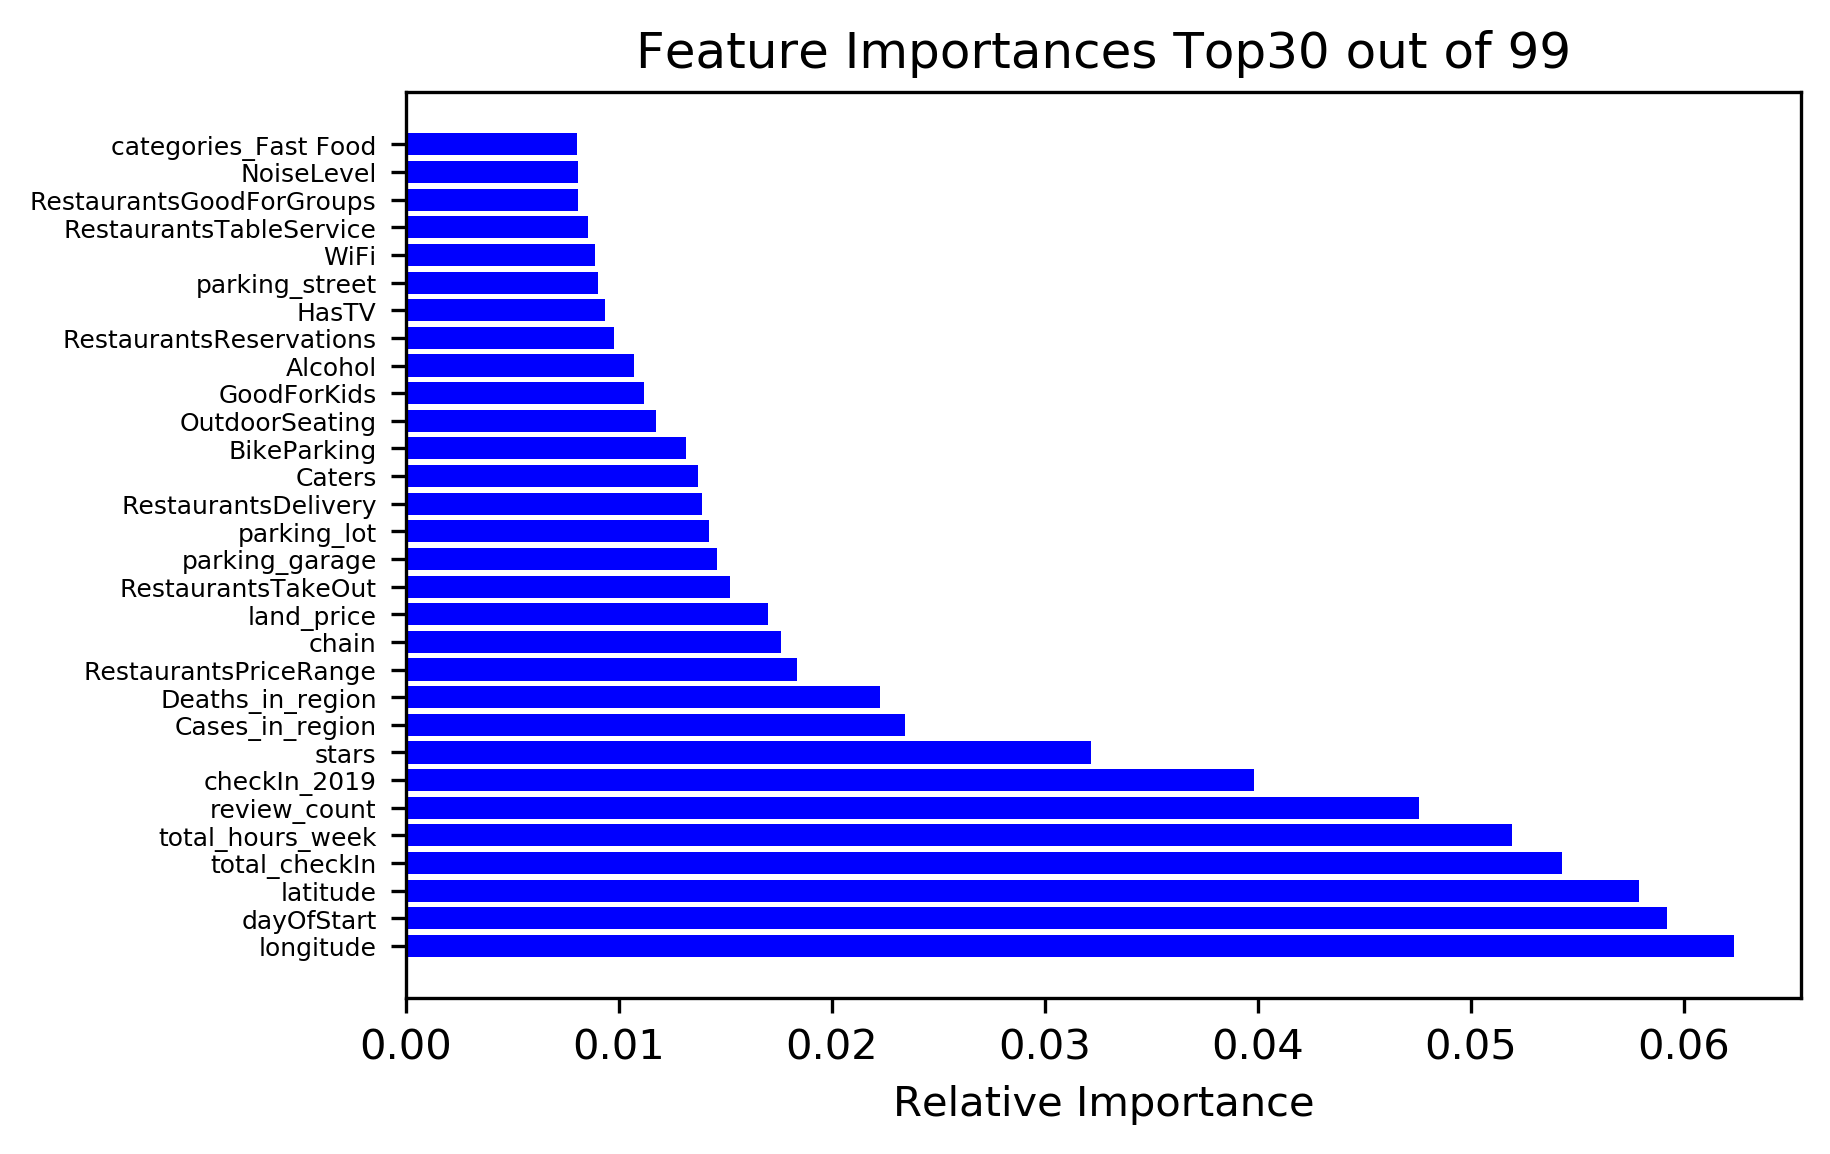

In [82]:
matplotlib.rc('font', size=10)
plt.rc('ytick', labelsize=6)
plt.title('Feature Importances Top30 out of 99')
plt.barh(list(df_imp_rf_sorted.index)[:30],df_imp_rf_sorted.iloc[:30,0], color='b', align='center')
plt.xlabel('Relative Importance')
plt.savefig("Feature Importances Random Forest.jpg",dpi=300)
plt.show()

## Logistic Regression

In [ ]:
# Multi
clf_lr_m = LogisticRegression(random_state=0)
score_lr_m = cross_val_score(clf_lr_m, X_m, Y_m, cv=10)

In [58]:
np.mean(score_lr_m)

0.5602514506769827

In [ ]:
# Binary
clf_lr_b = LogisticRegression(random_state=0)
score_lr_b = cross_val_score(clf_lr_b, X_b, Y_b, cv=10)

In [61]:
np.mean(score_lr_b)

0.6428035982008996

In [25]:
model_significance_m = sm.MNLogit(Y_m,sm.add_constant(X_m))

In [26]:
# Fit using statsmodel to get more information that skicit-learn can't give us
np.seterr(divide='ignore', invalid='ignore')
result_sig_m = model_significance_m.fit()

Optimization terminated successfully.
         Current function value: nan
         Iterations 14


/Users/lengjincheng/opt/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:2219: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))


In [21]:
model_significance_b = sm.Logit(Y_b,X_b)

In [23]:
result_sig_b = model_significance_b.fit(method='newton')

         Current function value: 0.605328
         Iterations: 35


/Users/lengjincheng/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [199]:
lr_coefficient = pd.DataFrame(result_sig_b.params)
lr_coefficient.to_csv("logisitic regression coefficient.csv")

In [72]:
df_sig_lr = pd.DataFrame(result_sig_b.pvalues[result_sig_b.pvalues< 0.05],columns = ["P_value"])

In [181]:
df_sig_lr1 = df_sig_lr.sort_values("P_value")

In [183]:
df_sig_lr1.to_csv("Logistic Regression P value.csv")